In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

import scipy.stats as stats
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

### BUSINESS PROBLEM-1

- Using lending club loans data, the team would like to test below hypothesis on how different factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)



#### Data Availabilty

In [144]:
#Importing and reading the data file:

loan_data = pd.read_csv("C:/Users/Dell/Downloads/Basic Statistics - Hypothesis Testing/4. Basic Statistics - Hypothesis Testing/LoansData.csv")
loan_data.head(5)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [145]:
loan_data.shape

(2500, 14)

In [146]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [147]:
loan_data.isnull().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

### Data Preparation: 

In [148]:
loan_data.columns = loan_data.columns.str.replace("."," ")
loan_data.columns

Index(['Amount Requested', 'Amount Funded By Investors', 'Interest Rate',
       'Loan Length', 'Loan Purpose', 'Debt To Income Ratio', 'State',
       'Home Ownership', 'Monthly Income', 'FICO Range', 'Open CREDIT Lines',
       'Revolving CREDIT Balance', 'Inquiries in the Last 6 Months',
       'Employment Length'],
      dtype='object')

In [149]:
#changing the data type:

loan_data['Interest Rate'] = loan_data['Interest Rate'].str.replace("%"," ").apply(pd.to_numeric)

In [150]:
loan_data['Debt To Income Ratio'] = loan_data['Debt To Income Ratio'].str.replace("%"," ").apply(pd.to_numeric)

In [151]:
loan_data.dtypes

Amount Requested                  float64
Amount Funded By Investors        float64
Interest Rate                     float64
Loan Length                        object
Loan Purpose                       object
Debt To Income Ratio              float64
State                              object
Home Ownership                     object
Monthly Income                    float64
FICO Range                         object
Open CREDIT Lines                 float64
Revolving CREDIT Balance          float64
Inquiries in the Last 6 Months    float64
Employment Length                  object
dtype: object

In [152]:
#dropping the Employement Length values:

loan_data = loan_data.dropna(subset=['Employment Length'])

In [153]:
#Since the null values are very less, hence dropping the values:

loan_data = loan_data.dropna()

In [154]:
loan_data.isnull().sum()

Amount Requested                  0
Amount Funded By Investors        0
Interest Rate                     0
Loan Length                       0
Loan Purpose                      0
Debt To Income Ratio              0
State                             0
Home Ownership                    0
Monthly Income                    0
FICO Range                        0
Open CREDIT Lines                 0
Revolving CREDIT Balance          0
Inquiries in the Last 6 Months    0
Employment Length                 0
dtype: int64

- All null values are treated,

#### a). Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

In [155]:
#step - 1 - H0:

print("H0: There is no significant difference between Interest rates for different loan amounts ")

H0: There is no significant difference between Interest rates for different loan amounts 


In [156]:
#step- 2 - Ha:

print("Ha: There is significant difference between Interest rates for different loan amounts. ")

Ha: There is significant difference between Interest rates for different loan amounts. 


CI=95%, Pvalue >0.05

In [157]:
#test:

stats.pearsonr(loan_data['Interest Rate'],loan_data['Amount Funded By Investors'])

PearsonRResult(statistic=0.33159553110364515, pvalue=5.064256950483673e-63)

In [158]:
print("Business Conclusion: Pvalue >0.05, hence we reject the Null hypothesis H0 and accept the alternative hypothesis Ha at 95% Confidence interval, we can say Interest rate is varied for different loan amounts.")

Business Conclusion: Pvalue >0.05, hence we reject the Null hypothesis H0 and accept the alternative hypothesis Ha at 95% Confidence interval, we can say Interest rate is varied for different loan amounts.


#### b). Loan length is directly effecting interest rate.

In [159]:
#step - 1 - H0:

print("H0: The Loan Length has no significant effect Interest rate.")

H0: The Loan Length has no significant effect Interest rate.


In [160]:
#step - 2 - Ha:

print("Ha: The Loan Length has significant effect Interest rate.")

Ha: The Loan Length has significant effect Interest rate.


CI=95%, Pvalue >0.05

In [161]:
loan_data['Loan Length'].value_counts()

36 months    1876
60 months     537
Name: Loan Length, dtype: int64

In [162]:
#length of each months:

loan_length_36 = loan_data[loan_data['Loan Length'] == '36 months']['Interest Rate']

In [163]:
loan_length_60 = loan_data[loan_data['Loan Length'] == '60 months']['Interest Rate']

In [164]:
loan_length_36.mean()

12.130074626865769

In [165]:
loan_length_60.mean()

16.378733705772785

In [166]:
#test:

stats.ttest_ind(loan_length_60,loan_length_36)

Ttest_indResult(statistic=23.05779328482699, pvalue=1.79380106734165e-106)

In [167]:
print("Business Conclusion: Pvalue is <0.05, hence we reject null hypothesis, we accept alternative hypothesis at 95% Confidence interval, we can say Loan length is directly effecting interest rate. ")

Business Conclusion: Pvalue is <0.05, hence we reject null hypothesis, we accept alternative hypothesis at 95% Confidence interval, we can say Loan length is directly effecting interest rate. 


#### c). Interest rate varies for different purpose of loans

In [168]:
#step - 1 - H0:

print("H0: Interest rate doesnt vary significantly for different purpose of loans")

H0: Interest rate doesnt vary significantly for different purpose of loans


In [169]:
#step - 2 - Ha:

print("Ha: Interest rate varies significantly for different purpose of loans")

Ha: Interest rate varies significantly for different purpose of loans


CI=95%, Pvalue >0.05

In [170]:
loan_data['Loan Purpose'].value_counts()

debt_consolidation    1262
credit_card            430
other                  189
home_improvement       147
major_purchase         100
small_business          83
car                     50
wedding                 37
moving                  29
medical                 28
vacation                20
house                   20
educational             14
renewable_energy         4
Name: Loan Purpose, dtype: int64

In [171]:
debt_consolidation = loan_data.loc[loan_data['Loan Purpose'] == 'debt_consolidation', 'Interest Rate']
credit_card = loan_data.loc[loan_data['Loan Purpose'] == 'credit_card', 'Interest Rate']
other = loan_data.loc[loan_data['Loan Purpose'] == 'other', 'Interest Rate']
home_improvement = loan_data.loc[loan_data['Loan Purpose'] == 'home_improvement', 'Interest Rate']
major_purchase = loan_data.loc[loan_data['Loan Purpose'] == 'major_purchase', 'Interest Rate']
small_business = loan_data.loc[loan_data['Loan Purpose'] == 'small_business', 'Interest Rate']
car = loan_data.loc[loan_data['Loan Purpose'] == 'car', 'Interest Rate']
wedding = loan_data.loc[loan_data['Loan Purpose'] == 'wedding', 'Interest Rate']
moving = loan_data.loc[loan_data['Loan Purpose'] == 'moving', 'Interest Rate']
medical = loan_data.loc[loan_data['Loan Purpose'] == 'medical', 'Interest Rate']
vacation = loan_data.loc[loan_data['Loan Purpose'] == 'vacation', 'Interest Rate']
house = loan_data.loc[loan_data['Loan Purpose'] == 'house', 'Interest Rate']
educational = loan_data.loc[loan_data['Loan Purpose'] == 'educational', 'Interest Rate']
renewable_energy = loan_data.loc[loan_data['Loan Purpose'] == 'renewable_energy', 'Interest Rate']

In [172]:
stats.f_oneway(debt_consolidation, credit_card, other, home_improvement, major_purchase, small_business, car, wedding, moving, medical, vacation, house, educational, renewable_energy)

F_onewayResult(statistic=7.330838185919651, pvalue=2.7646672581411367e-14)

In [173]:
print("Business Conclusion: Pvalue is <0.05, hence we reject null hypothesis, we accept alternative hypothesis at 95% Confidence      interval, we can say Interest rate varies for different purpose of loans. ")

Business Conclusion: Pvalue is <0.05, hence we reject null hypothesis, we accept alternative hypothesis at 95% Confidence      interval, we can say Interest rate varies for different purpose of loans. 


#### d). There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [174]:
#step - 1 - H0:

print("H0: There is no significant relationship between FICO scores and Home Ownership. ")

H0: There is no significant relationship between FICO scores and Home Ownership. 


In [175]:
#step - 2 - Ha:

print("Ha: There is significant relationship between FICO scores and Home Ownership. ")

Ha: There is significant relationship between FICO scores and Home Ownership. 


CI=95%, Pvalue >0.05

In [176]:
loan_data['Home Ownership'].value_counts()

RENT        1110
MORTGAGE    1109
OWN          189
OTHER          5
Name: Home Ownership, dtype: int64

In [177]:
## Converting the data type of FICO Range:
loan_data['FICO Range'] = loan_data['FICO Range'].apply(lambda x: x.replace('-', '') if isinstance(x, str) else x)

In [178]:
loan_data['FICO Range'] = loan_data['FICO Range'].astype(int)

In [179]:
Rent = loan_data.loc[loan_data['Home Ownership'] == 'RENT', 'FICO Range']
Mortgage = loan_data.loc[loan_data['Home Ownership'] == 'MORTGAGE', 'FICO Range']
Own = loan_data.loc[loan_data['Home Ownership'] == 'OWN', 'FICO Range']
Other = loan_data.loc[loan_data['Home Ownership'] == 'OTHER', 'FICO Range']

In [180]:
stats.f_oneway(Rent, Mortgage, Own, Other)

F_onewayResult(statistic=20.654646652222116, pvalue=3.2682005447315283e-13)

In [181]:
print("Business Conclusion: Pvalue is <0.05, hence we reject null hypothesis, we accept alternative hypothesis at 95% Confidence interval, we can say there is relationship between FICO scores and Home Ownership.")

Business Conclusion: Pvalue is <0.05, hence we reject null hypothesis, we accept alternative hypothesis at 95% Confidence interval, we can say there is relationship between FICO scores and Home Ownership.


## BUSINESS PROBLEM - 2

#### BUSINESS PROBLEM: We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

### Data Availability:


In [182]:
#loading and reading data:

price = pd.read_csv("C:/Users/Dell/Downloads/Basic Statistics - Hypothesis Testing/4. Basic Statistics - Hypothesis Testing/Price_Quotes.csv")

In [183]:
price.head(5)

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129


In [184]:
price.shape

(12, 3)

In [185]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


- Data doesnt have any null and missing values.
- Data types of all columns are in correct format.

#### We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [186]:
#step - 1 - H0:

print("H0: There is no significant difference in the average price quotes provided by Mary and Barry.")

H0: There is no significant difference in the average price quotes provided by Mary and Barry.


In [187]:
#step - 2 - Ha:

print("Ha: There is significant difference in the average price quotes provided by Mary and Barry.")

Ha: There is significant difference in the average price quotes provided by Mary and Barry.


CI=95%, Pvalue >0.05

In [188]:
price.Barry_Price.mean()

124.33333333333333

In [189]:
price.Mary_Price.mean()

114.75

In [190]:
#test:

stats.ttest_ind(price.Barry_Price,price.Mary_Price)

Ttest_indResult(statistic=1.4147436739281787, pvalue=0.17114226132118285)

In [191]:
print("Business Conclusion: Pvalue >0.05, hence we fail to reject the Null hypothesis. At 95% Confidence interval, we cannot justify  that there is difference in the average price quotes provided by Mary and Barry.")

Business Conclusion: Pvalue >0.05, hence we fail to reject the Null hypothesis. At 95% Confidence interval, we cannot justify  that there is difference in the average price quotes provided by Mary and Barry.


## Business Problem - 3:

### Data Availabilty:

In [192]:
data =  pd.read_csv("C:/Users/Dell/Downloads/Basic Statistics - Hypothesis Testing/4. Basic Statistics - Hypothesis Testing/Treatment_Facility.csv")

In [193]:
data.head(5)

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [194]:
data.shape

(20, 5)

- Data doesn't have any null and missing values.

In [195]:
#renaming the column names of VAR4,VAR5:

data = data.rename(columns={'VAR4': 'TRFF', 'VAR5': 'CI'})

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   TRFF               20 non-null     float64
 4   CI                 20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


#### Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

#### a). The reengineering effort had on the incidence behavioral problems and staff turnover.

In [197]:
#step - 1 - H0:

print("H0: The reengineering has no effect on the incidence behavioral problems and staff turnover.")

H0: The reengineering has no effect on the incidence behavioral problems and staff turnover.


In [198]:
#step - 2 - Ha:

print("Ha: The reengineering has effect on the incidence behavioral problems and staff turnover.")

Ha: The reengineering has effect on the incidence behavioral problems and staff turnover.


CI=95%, Pvalue >0.05

In [199]:
prior_turnover = data.loc[data['Reengineer'] == 'Prior', 'Employee_Turnover']
post_turnover = data.loc[data['Reengineer'] == 'Post', 'Employee_Turnover']

In [200]:
contingency_table = pd.crosstab(data['Reengineer'], data['Employee_Turnover'])

In [201]:
#test:

stats.ttest_ind(prior_turnover,post_turnover)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

In [202]:
stats.chi2_contingency(contingency_table)

(17.8021978021978,
 0.46875311570416667,
 18,
 array([[0.7 , 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35,
         0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35],
        [1.3 , 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
         0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65]]))

In [203]:
print("Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we cannot justify that   there is reengineering effect on the incidence behavioral problems and staff turnover. ")

Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we cannot justify that   there is reengineering effect on the incidence behavioral problems and staff turnover. 


####  b). To determine if the reengineering effort changed the critical incidence rate.

In [204]:
#step - 1 - H0:

print("H0: The reengineering effort did not change the critical incidence rate.")

H0: The reengineering effort did not change the critical incidence rate.


In [205]:
#step - 2 - Ha:

print("Ha: The reengineering effort changed the critical incidence rate.")

Ha: The reengineering effort changed the critical incidence rate.


CI=95%, Pvalue >0.05

In [206]:
prior_turnover = data.loc[data['Reengineer'] == 'Prior', 'CI']
post_turnover = data.loc[data['Reengineer'] == 'Post', 'CI']

In [207]:
#test:
stats.ttest_ind(prior_turnover,post_turnover)

Ttest_indResult(statistic=1.627914425352865, pvalue=0.12091989189884148)

In [208]:
print("Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we cannot justify that   the reengineering effort changed the critical incidence rate. ")

Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we cannot justify that   the reengineering effort changed the critical incidence rate. 


## Business Problem - 4:

### Data Availabilty:

In [209]:
priority_data = pd.read_csv("C:/Users/Dell/Downloads/Basic Statistics - Hypothesis Testing/4. Basic Statistics - Hypothesis Testing/Priority_Assessment.csv")

In [210]:
priority_data.head(5)

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium


In [211]:
priority_data.shape

(642, 2)

In [212]:
priority_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


Data doesn't have any null and missing values.

#### If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether thisis, in fact, occurring.

In [213]:
#step - 1 - H0:

print("H0: There  is no significant difference in average completion time between High, medium and low priority jobs.")

H0: There  is no significant difference in average completion time between High, medium and low priority jobs.


In [214]:
#step - 2 - Ha:

print("Ha: There is significant difference in average completion time between High, medium and low priority jobs.")

Ha: There is significant difference in average completion time between High, medium and low priority jobs.


CI=95%, Pvalue >0.05

In [215]:
high = priority_data.loc[priority_data['Priority'] == 'High', 'Days']
medium = priority_data.loc[priority_data['Priority'] == 'Medium', 'Days']
low = priority_data.loc[priority_data['Priority'] == 'Low', 'Days']

In [216]:
stats.f_oneway(high,medium,low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [217]:
print("Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we cannot justify that   high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs.")

Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we cannot justify that   high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs.


### BUSINESS PROBLEM-5

#### Data Availabilty:

In [218]:
film = pd.read_csv("C:/Users/Dell/Downloads/Basic Statistics - Hypothesis Testing/4. Basic Statistics - Hypothesis Testing/Films.csv")

In [219]:
film.head(5)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [220]:
film.shape

(330, 11)

In [221]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [222]:
film.isnull().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [223]:
film.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [224]:
#where 1 = male  2 = female

#replacing the values with thier interpetion:
film['Gender'] = film['Gender'].replace({'1':'Male','2':'Female'})

In [225]:
film.Gender.value_counts()

Female    213
Male      117
Name: Gender, dtype: int64

In [226]:
film.Marital_Status.value_counts()

2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [227]:
#1 = married; 2 = single

#replacing the values with thier interpetion:

film['Marital_Status'] = film['Marital_Status'].replace({'1':'Married','2':'Single','Slngle':'Single'})

In [228]:
film.Marital_Status.value_counts()

Single     228
Married    100
Name: Marital_Status, dtype: int64

In [229]:
film = film.dropna()

In [230]:
film.isnull().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

- all the null values are treated with fillna()

#### a). What is the overall level of customer satisfaction?

In [231]:
#step - 1 - H0:

print("H0: There  is no significant difference in the overall level of customer satisfaction. ")

H0: There  is no significant difference in the overall level of customer satisfaction. 


In [232]:
#step - 2 - Ha:

print("Ha: There is significant difference in the overall level of customer satisfaction. ")

Ha: There is significant difference in the overall level of customer satisfaction. 


CI=95%, Pvalue >0.05

In [233]:
mean = film['Overall'].mean()
mean

1.6212624584717608

In [234]:
std_dev = film['Overall'].std()
std_dev

0.6753367561589327

In [235]:
SE = std_dev / np.sqrt(film.shape[0])

In [236]:
mean-(1.96*SE)

1.5449679620169605

In [237]:
mean+(1.96*SE)

1.697556954926561

In [238]:
print("At 95% Confidence interval, we can say that the overall level of customer satisfaction ranges between (1.5337142222363835,1.6844675959454347)")

At 95% Confidence interval, we can say that the overall level of customer satisfaction ranges between (1.5337142222363835,1.6844675959454347)


#### b). What factors are linked to satisfaction?


In [239]:
#step - 1 - H0:

print("H0: There  is no significant relation between factors and customer satisfaction.")

H0: There  is no significant relation between factors and customer satisfaction.


In [240]:
#step - 2 - Ha:

print("Ha: There is significant relation between factors and customer satisfaction.")

Ha: There is significant relation between factors and customer satisfaction.


CI=95%, Pvalue >0.05

In [241]:
# lets consider Factor as Movie:

film.Movie.value_counts()

Willy Wonka                142
Ferris Buellers Day Off    128
Old School                  31
Name: Movie, dtype: int64

In [242]:
willy_wonka = film.loc[film['Movie'] == 'Willy Wonka', 'Overall']
ferris_buellers_day_off = film.loc[film['Movie'] == 'Ferris Buellers Day Off', 'Overall']
old_school = film.loc[film['Movie'] == 'Old School', 'Overall']

In [243]:
stats.f_oneway(willy_wonka,ferris_buellers_day_off,old_school)

F_onewayResult(statistic=1.6544157936900297, pvalue=0.19295498598334151)

In [244]:
print("Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we can't say that Movie  factor are linked to customer satisfaction.")

Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we can't say that Movie  factor are linked to customer satisfaction.


In [245]:
# lets consider Factor as Gender:

film.Gender.value_counts()

Female    195
Male      106
Name: Gender, dtype: int64

In [246]:
contingency_table1 = pd.crosstab(film['Gender'], film['Overall'])

In [247]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table1)

In [248]:
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 3.520985228074472
p-value: 0.4746946769990794


In [249]:
print("Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we can't say that Gender factor are linked to customer satisfaction.")

Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we can't say that Gender factor are linked to customer satisfaction.


In [250]:
# lets consider Factor as Marital_Status:

film.Marital_Status.value_counts()

Single     210
Married     91
Name: Marital_Status, dtype: int64

In [251]:
film.dropna(subset=['Marital_Status'], inplace=True)

In [252]:
married = film.loc[film['Marital_Status'] == 'Married', 'Overall']
single = film.loc[film['Marital_Status'] == 'Single', 'Overall']

In [253]:
stats.ttest_ind(married,single)

Ttest_indResult(statistic=-0.6562891067310667, pvalue=0.5121428623046123)

In [254]:
print("Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we can't say that Marital Status factor are linked to customer satisfaction.")

Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we can't say that Marital Status factor are linked to customer satisfaction.


In [255]:
#lets consider Factor as Sinage:

film.Sinage.value_counts()

2.0    140
1.0    105
3.0     45
4.0      6
5.0      5
Name: Sinage, dtype: int64

In [256]:
stats.pearsonr(film.Sinage,film.Overall)

PearsonRResult(statistic=0.41068947395476774, pvalue=1.1216055328082663e-13)

In [257]:
print("Business Conclusion: pvalue <0.05, hence we can reject Null hypothesis. At 95% Confidence interval, we can say that Sinage   factor is linked to customer satisfaction.")

Business Conclusion: pvalue <0.05, hence we can reject Null hypothesis. At 95% Confidence interval, we can say that Sinage   factor is linked to customer satisfaction.


In [258]:
#lets consider Factor as Parking:

film.Parking.value_counts()

2.0    139
1.0    122
3.0     29
4.0      7
5.0      4
Name: Parking, dtype: int64

In [259]:
stats.ttest_ind(film.Parking,film.Overall)

Ttest_indResult(statistic=2.556336929126799, pvalue=0.010823193586261687)

In [260]:
print("Business Conclusion: pvalue <0.05, hence we can reject Null hypothesis. At 95% Confidence interval, we can say that Parking    factor is linked to customer satisfaction.")

Business Conclusion: pvalue <0.05, hence we can reject Null hypothesis. At 95% Confidence interval, we can say that Parking    factor is linked to customer satisfaction.


In [261]:
#lets consider Factor as Clean:

film.Clean.value_counts()

2.0    138
1.0    134
3.0     22
4.0      5
5.0      2
Name: Clean, dtype: int64

In [262]:
stats.ttest_ind(film.Clean,film.Overall)

Ttest_indResult(statistic=1.0371467603654085, pvalue=0.30008526066930125)

In [263]:
print("Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we can't say that Clean  Factor is linked to customer satisfaction.")  

Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we can't say that Clean  Factor is linked to customer satisfaction.


In [264]:
#lets consider Factor as Age:

film.Age.value_counts()

2.0    164
3.0    108
1.0     22
4.0      7
Name: Age, dtype: int64

In [265]:
stats.ttest_ind(film.Age,film.Overall)

Ttest_indResult(statistic=13.20903770904427, pvalue=3.7705617209124056e-35)

In [266]:
print("Business Conclusion: pvalue <0.05, hence we can reject Null hypothesis. At 95% Confidence interval, we can say that Age Factor is linked to customer satisfaction.")

Business Conclusion: pvalue <0.05, hence we can reject Null hypothesis. At 95% Confidence interval, we can say that Age Factor is linked to customer satisfaction.


In [267]:
#lets consider Factor as Income:

film.Income.value_counts()

1.0    135
3.0     86
2.0     80
Name: Income, dtype: int64

In [268]:
income1 = film.loc[film['Income'] == 1.0, 'Overall']
income2 = film.loc[film['Income'] == 2.0, 'Overall']
income3 = film.loc[film['Income'] == 3.0, 'Overall']

In [269]:
stats.f_oneway(income1,income2,income3)

F_onewayResult(statistic=0.07833541197338059, pvalue=0.9246732684933006)

In [270]:
print("Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we can't say that Income Factor is linked to customer satisfaction.") 

Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we can't say that Income Factor is linked to customer satisfaction.


In [271]:
#lets consider Factor as Hear_About:

film.Hear_About.value_counts()

5      212
4       39
1       19
3       13
2       11
2,5      2
4,5      1
1,5      1
5,4      1
3,5      1
3,4      1
Name: Hear_About, dtype: int64

In [272]:
Hear_About_5 = film.loc[film['Hear_About'] == '5', 'Overall']
Hear_About_4 = film.loc[film['Hear_About'] == '4', 'Overall']
Hear_About_3 = film.loc[film['Hear_About'] == '3', 'Overall']
Hear_About_2 = film.loc[film['Hear_About'] == '2', 'Overall']
Hear_About_1 = film.loc[film['Hear_About'] == '1', 'Overall']
Hear_About_2_5 = film.loc[film['Hear_About'] == '2,5', 'Overall']
Hear_About_3_4 = film.loc[film['Hear_About'] == '3,4', 'Overall']
Hear_About_4_5 = film.loc[film['Hear_About'] == '4,5', 'Overall']
Hear_About_1_5 = film.loc[film['Hear_About'] == '1,5', 'Overall']
Hear_About_5_4 = film.loc[film['Hear_About'] == '5,4', 'Overall']
Hear_About_3_5 = film.loc[film['Hear_About'] == '3,5', 'Overall']

In [273]:
stats.f_oneway(Hear_About_5,Hear_About_4,Hear_About_3,Hear_About_2,Hear_About_1,Hear_About_2_5,Hear_About_3_4,Hear_About_4_5,Hear_About_1_5,Hear_About_5_4,Hear_About_3_5)

F_onewayResult(statistic=1.3239633373096027, pvalue=0.21684279967574144)

In [274]:
print("Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we can't say that Hear-   About Factor is linked to customer satisfaction.") 

Business Conclusion: pvalue >0.05, hence we can't reject Null hypothesis. At 95% Confidence interval, we can't say that Hear-   About Factor is linked to customer satisfaction.


- Sinage, Parking, Age are factors that are linked to Customer Satisfaction.

#### c).What is the demographic profile of Film on the Rocks patrons?

Text(0.5, 1.0, 'Gender Distribution')

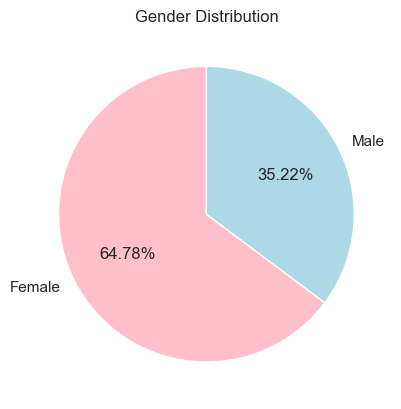

In [275]:
#Gender

labels = ['Female', 'Male']
colors = ['Pink','lightblue']
a= film['Gender'].value_counts()/film.shape[0]
plt.pie(a,labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Gender Distribution')

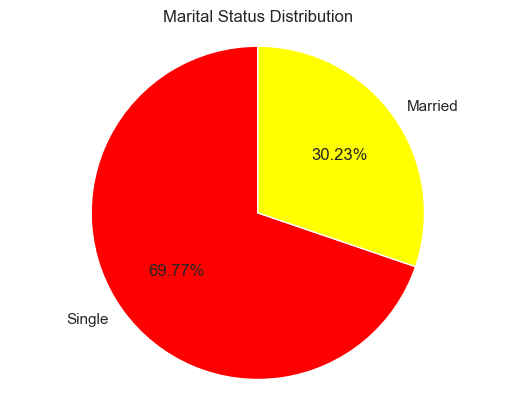

In [276]:
#Marital_Status

labels = ['Single', 'Married']
colors = ['red', 'yellow']
a = film['Marital_Status'].value_counts() / film.shape[0]
plt.pie(a, labels=a.index, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Marital Status Distribution')
plt.axis('equal')
plt.show()

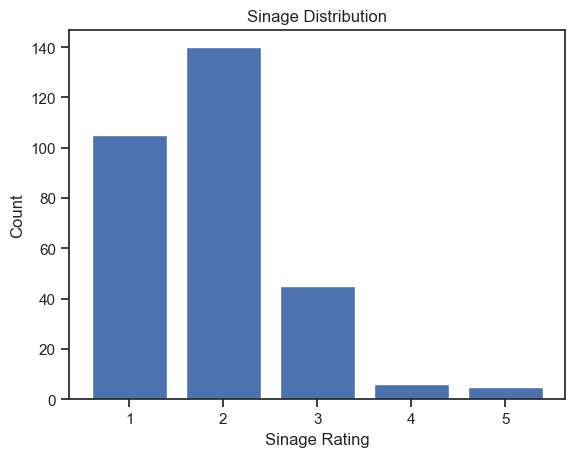

In [277]:
#Sinage:

a = film['Sinage'].value_counts()
plt.bar(a.index, a.values)
plt.xlabel('Sinage Rating')
plt.ylabel('Count')
plt.title('Sinage Distribution')
plt.show()

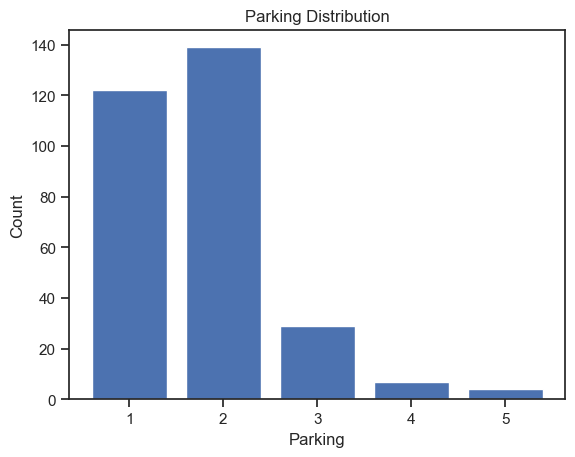

In [278]:
#Parking:

a = film['Parking'].value_counts()
plt.bar(a.index, a.values)
plt.xlabel('Parking')
plt.ylabel('Count')
plt.title('Parking Distribution')
plt.show()

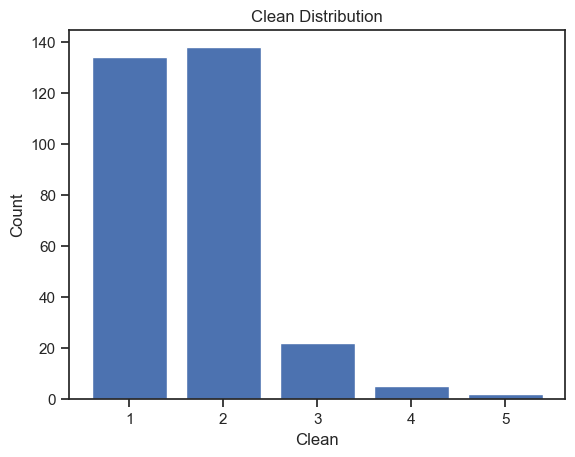

In [279]:
#Clean:

a = film['Clean'].value_counts()
plt.bar(a.index, a.values)
plt.xlabel('Clean')
plt.ylabel('Count')
plt.title('Clean Distribution')
plt.show()

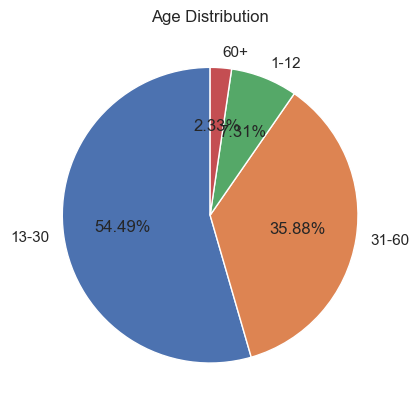

In [280]:
a = film['Age'].value_counts()
labels = ['13-30','31-60','1-12','60+']
plt.pie(a, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Age Distribution')
plt.show()

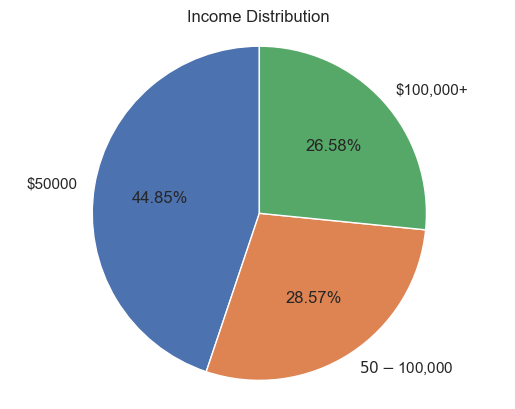

In [281]:
#Income:

a = film['Income'].value_counts()
labels = ['$50000','$50-$100,000','$100,000+']
plt.pie(a, labels=labels,autopct='%1.2f%%', startangle=90)
plt.title('Income Distribution')
plt.axis('equal')
plt.show()

#### d). In what media outlet(s) should the film series be advertised?

In [282]:
film.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [283]:
#Hear about is response to film:
#1 = television; 2 =newspaper; 3 = radio; 4 = website; 5 = word of mouth

hear_about = film['Hear_About'].value_counts()
hear_about

5      212
4       39
1       19
3       13
2       11
2,5      2
4,5      1
1,5      1
5,4      1
3,5      1
3,4      1
Name: Hear_About, dtype: int64

In [284]:
outlets = hear_about[hear_about == hear_about.max()].index.tolist()
print("The film series be advertised in the following media outlets: ",outlets," is Word of Mouth")

The film series be advertised in the following media outlets:  ['5']  is Word of Mouth
